# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("./data/lfw/*/*"))
dog_files = np.array(glob("./data/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


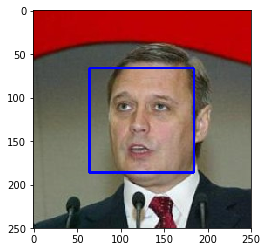

In [38]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[100])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [39]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

Oops, really? no human on this image?


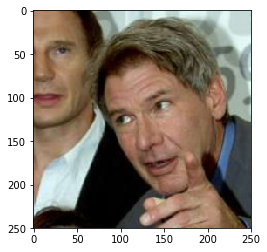

Oops, really? no human on this image?


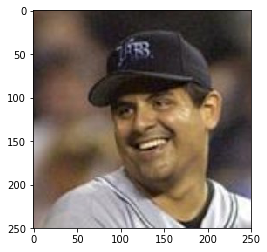

Humans detected as humans: 98 of 100; (expected: 100)
Dog recognized as a human


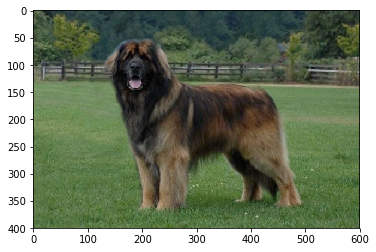

Dog recognized as a human


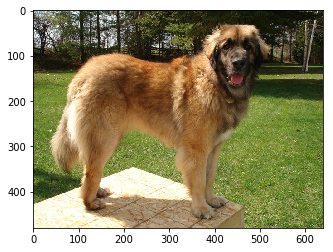

Dog recognized as a human


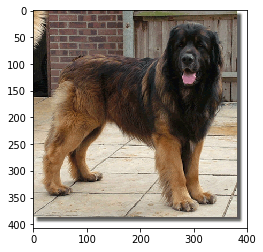

Dog recognized as a human


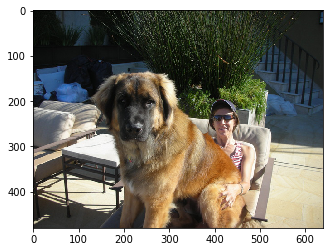

Dog recognized as a human


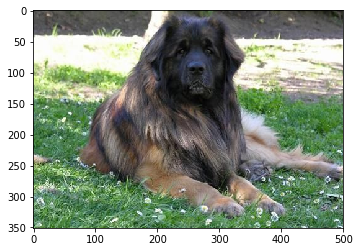

Dog recognized as a human


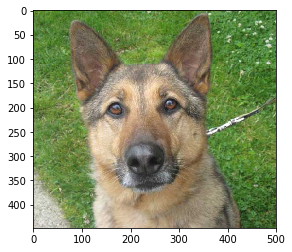

Dog recognized as a human


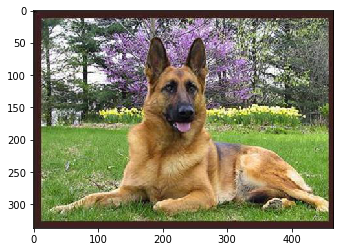

Dog recognized as a human


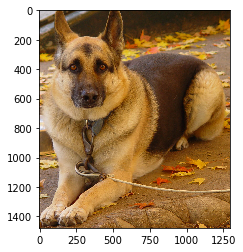

Dog recognized as a human


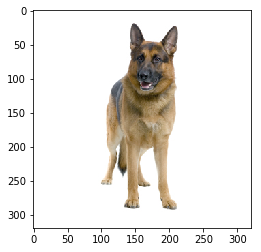

Dog recognized as a human


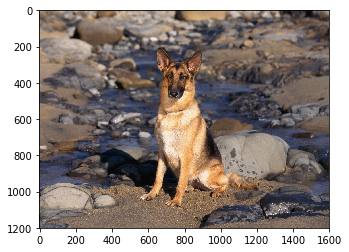

Dog recognized as a human


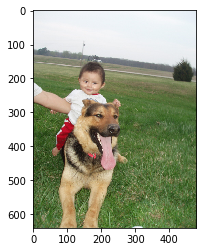

Dog recognized as a human


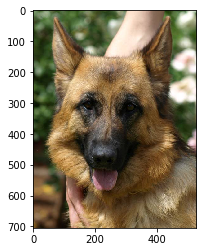

Dog recognized as a human


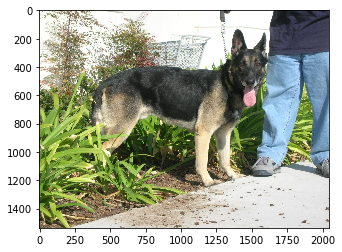

Dog recognized as a human


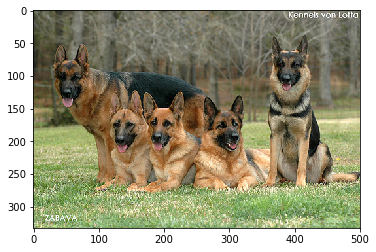

Dog recognized as a human


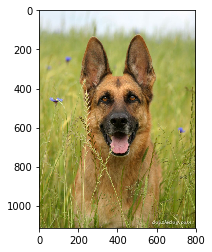

Dogs detected as humans: 15 of 100; (expected: 0)


In [41]:
from PIL import Image
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

human_as_human_num = 0
for human_file in human_files_short:
    if face_detector(human_file):
        human_as_human_num += 1
    else: 
        # show human image that was not correctly recognized
        print('Oops, really? no human on this image?')
        incorrectly_classified = Image.open(human_file)
        plt.imshow(incorrectly_classified)
        plt.show()
        
print('Humans detected as humans: {} of 100; (expected: 100)'.format(human_as_human_num))

dogs_as_human_num = 0
for dog_file in dog_files_short:
    if face_detector(dog_file):
        dogs_as_human_num += 1
        # show the ~werewolf~ human dog
        print("Dog recognized as a human")
        incorrectly_classified = Image.open(dog_file)
        plt.imshow(incorrectly_classified)
        plt.show()
        
        
#Cannot use formatted strings like this as AWS VM uses Python 3.5: f'Dogs detected as humans: {dogs_as_human_num} of 100; (expected: 0)'
print('Dogs detected as humans: {} of 100; (expected: 0)'.format(dogs_as_human_num))


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

## Problems with CUDA on AWS AMIs

Udacity's lesson about [Cloud Computing](Deep Learning AMI with Source Code) recommends using the "Deep Learning AMI with Source Code (CUDA 8, Ubuntu)" AMI run notebooks.   
CUDA 8 is old, and AMI for CUDA 9 is available. 

#### Using CUDA 8 AMI 
`torch.cuda.is_available()` returns false, and IIRC there are other conflicts with torch and torchvision.

#### Using CUDA 9 AMI 
As I had problems with using CUDA on the older AMI, I installed a newer one. 
Initially, `torch.cuda.is_available()` was returning true (as expected), but torch wasn't installed even though I initiated the dependencies from requirements.txt.  

After installing torch, `torch.cuda.is_available()` became false and computation became __very__ slow.   
The problem is described here: described here: https://github.com/pytorch/pytorch/issues/15612   
I followed their advice and installed a nightly build of torch which contained the fix: 
```
!pip3 install torch_nightly -f https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html
```
It worked, but cuda got disabled after the following EC2 instance restart. After the restart, even using the nightly buyild wasn't helping any more. So, I updated the driver as described here:  https://docs.aws.amazon.com/AWSEC2/latest/UserGuide/install-nvidia-driver.html


In [7]:
import torch

# check if CUDA is available
use_cuda = torch.cuda.is_available()
# Make sure that CUDA is still available :) 
# One time, I waited for 30 minutes to run a single epoch, only to find out that
# CUDA was not available 
print('use_cuda:', use_cuda)

# I had several cases of errors because the GPU was running out of memory. 
# This empties the cache and fixes the problem.
torch.cuda.empty_cache()

use_cuda: True


In [42]:
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [43]:
from PIL import Image
import torchvision.transforms as transforms

def image_to_tensor(img):
    transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])
    
    image_tensor = transform(img)
    return image_tensor.unsqueeze(0)

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    image_tensor = image_to_tensor(Image.open(img_path)) 
    if use_cuda:
        image_tensor = image_tensor.cuda()
        
    predicted = VGG16(image_tensor)
    if use_cuda:
        predicted = predicted.cpu()
    
    predicted = predicted.data.numpy().argmax()
    
    return predicted # predicted class index


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [44]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    predicted_class = VGG16_predict(img_path)
    # VGG16 distinguishes 118 (== 268-151+1) dog breeds
    return 151 <= predicted_class and predicted_class <= 268 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [45]:
# Fixes errors like 'OSError: image file is truncated (150 bytes not processed)'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

humans_detected_as_dog = filter(lambda x : dog_detector(x), human_files_short)
human_as_dog_num = len(list(humans_detected_as_dog))
        
print('Humans detected as dogs: {}%'.format(human_as_dog_num))

# Similar thing, implemented with lambdas. More readable!
dogs_detected_as_dog = filter(lambda x : dog_detector(x), dog_files_short)
dogs_as_dog_num = len(list(dogs_detected_as_dog))

print('Dogs detected as dogs: {}%'.format(dogs_as_dog_num)) # can use as per cents as dog_files_short has 100 items


Humans detected as dogs: 2%
Dogs detected as dogs: 100%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [12]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

num_workers = 0
batch_size = 32

# Normalizer from https://pytorch.org/docs/stable/torchvision/models.html
image_normalizer = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# In my first 1000 revisions, I called it simply `transforms`.
# Big mistake! It overrode `import torchvision.transforms as transforms`
image_transforms = {
    'train':  transforms.Compose([
        transforms.RandomHorizontalFlip(), # default p=0.5
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(),
        image_normalizer ]),
    # no need to flip or rotate in validation and test sets
    'valid':  transforms.Compose([ 
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        image_normalizer ]),
    'test':  transforms.Compose([
        transforms.CenterCrop((224, 224)),
        transforms.ToTensor(),
        image_normalizer ])

}

loaders_scratch = {}

dog_images_dir = './data/dogImages/'

for loader_type in ['train', 'valid', 'test']:
    dataset = datasets.ImageFolder(os.path.join(dog_images_dir, loader_type), transform=image_transforms[loader_type])
    # shuffle=True is essential here, without a batch would consist of mostly photos of the same breed
    loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size, num_workers=num_workers)
    loaders_scratch[loader_type]=loader

dog_classes = loaders_scratch['train'].dataset.classes

In [32]:
print('The training dataset defines {} classes for dog breeds'.format(len(dog_classes)))

The training dataset defines with 133 classes for dog breeds


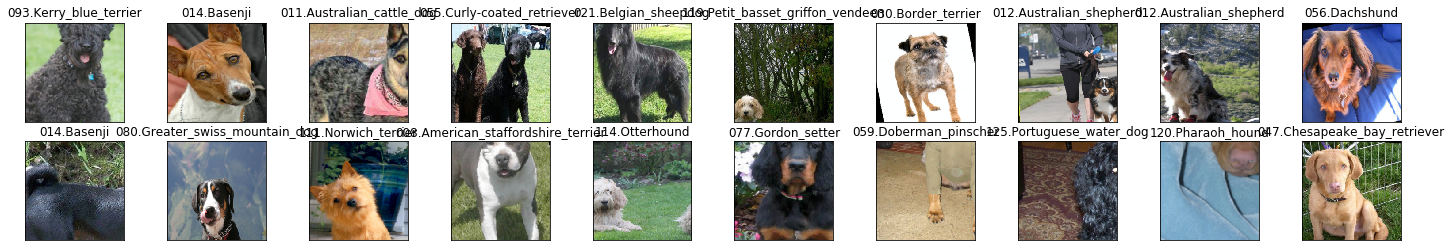

In [16]:
import matplotlib.pyplot as plt                        
%matplotlib inline  


def tensor_to_image(tensor):
    tensor = tensor #.to("cpu").clone().detach()
    tensor = tensor.numpy().squeeze()
    image = tensor.transpose(1,2,0)
    # revert transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
    image = image.clip(0, 1)
    return image

dataiter = iter(loaders_scratch['train'])
images, labels = dataiter.next()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(tensor_to_image(images[idx]))
    ax.set_title(dog_classes[labels[idx]])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


## Answer:
> How does your code resize the images (by cropping, stretching, etc)? What size did you pick for the input tensor, and why?


I chose 224 as size because it's used by VGG and other ImageNet models. If this size is appropriate for VGG, I can try using it too!  

> Did you decide to augment the dataset? If so, how (through translations, flips, rotations, etc)? If not, why not?


I also added random horizontal flips as it doesn't define a dog breed(a dog in the mirror is exactly the same breed), but may help for the training by adding variability and, thus, augmenting the dataset.   
I also added +-10 degree rotations as images for the same reason.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

### Background Info: Architectures previously used in this course

#### CIFAR
* Input: 32x32 RGB
* Output: 10 classes

```
Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25)
)
```

#### Best practices
I read these articles on best practices:
* https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7
* https://www.topbots.com/14-design-patterns-improve-convolutional-neural-network-cnn-architecture/


and followed these recommendations:
* "Always start by using smaller filters is to collect as much local information as possible"
* "...the number of channels generally increase or stay the same while we progress through layers in our convolutional neural net architecture"
* "General filter sizes used are 3x3, 5x5 and 7x7 for the convolutional layer for a moderate or small-sized images and for Max-Pooling parameters we use 2x2 or 3x3 filter sizes with a stride of 2."
* "Always use classic networks like LeNet, AlexNet, VGG-16, VGG-19 etc. as an inspiration while building the architectures for your models. "
   ** I used VGG-16 network as inspiration

#### Our model
* Input: 224x224 RGB
* Output: 133 classes

In [51]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        
        # takes 224x224x3
        self.conv1_1 = nn.Conv2d(3, 32, 3, padding=1)
        
        # takes 224/2 = 112 ->    112x112x32
        self.conv2_1 = nn.Conv2d(32, 64, 3, padding=1)
        
        # takes 112/2= 56
        self.conv3_1 = nn.Conv2d(64, 128, 3, padding=1)
        
        # takes 56/2= 28
        self.conv4_1 = nn.Conv2d(128, 256, 3, padding=1)
        
        # takes 28/2= 14
        self.conv5_1 = nn.Conv2d(256, 512, 3, padding=1)
        
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(512*7*7, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 133)
        
        self.dropout = nn.Dropout(0.30)
    
    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = self.pool(x)

        x = F.relu(self.conv2_1(x))
        x = self.pool(x)

        x = F.relu(self.conv3_1(x))
        x = self.pool(x)

        x = F.relu(self.conv4_1(x))
        x = self.pool(x)
        
        x = F.relu(self.conv5_1(x))
        x = self.pool(x)

        x = x.view(-1, 512*7*7)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))

        x = self.dropout(x)
        x = F.relu(self.fc2(x))

        x = self.dropout(x)
        x = self.fc3(x)
        
        return x
    

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# Modified weight initialization here. Made it worse!! 
# model_scratch.apply(weights_init_normal)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

## Answer: Outline the steps you took to get to your final CNN architecture and your reasoning at each step

### Issues with reproducibility
I started with using the Jupyther notebook supplied as a part of the lesson. But! Running the same code was producing completely different results. I tried restarting the kernel,but it didn't help.  
To have more flexibilty, I switched to a notebook ran on AWS where I could also restart the notebook and even reboot the machine. Still, running the same code was producing diffferent results. One time it would get stuck at validation loss around 4.8 for thr first 10 epochs (and then I would shut it down).   
Another time, using the same code, it would learn very efficiently and obtain validation loss below 4.0 by 10th epoch.  
Given this, I chose the current architecture as it the simplest architecture I've got that gives the needed result (test accuracy = 19% > 10%). I created it using the best practices I outlined above.   

Below, you can find other architectures that I tried.   

---


### Notes on importance of shuffling data and other thoughts
I was having terrible results with both validation and even training losses getting worse with each epoch. I tried different architectures and criteria, but all performed equally bad. After spending several hours on debugging, I noticed that images in a batch all were very similar and usually had photos of the same breed. After shuffling data ib the loader (`shuffle=True`) fixed this problem. 

Lesson learned!

At this point, starting from epoch 13, training loss was still becoming better (which is good), but validation loss stopped improving(which bad). It could be a sign of overfitting. After 20 epochs (with the best validation loss on 12th epoch), the test accuracy was only 9%. 

### Version 2
I already had dropouts for my fully connected layers, so, I added more variability to the photos:

Was:
```
    transforms.RandomHorizontalFlip(0.2), # default p=0.5
    transforms.RandomRotation(10),
```
Became:
```
    transforms.RandomHorizontalFlip(), # default p=0.5
    transforms.RandomRotation(20),
```

It made the things worse, training loss was improving, but validation was getting worse. (3.49 and 4.15 for first epoch, and then going in opposite directions)

### Version 3
I changed SGD to Adam.
Using Adam didn't work very well,  
at the 6th epoch: Training Loss: 4.871895 	Validation Loss: 4.869257  
Changing back to CGD!

### Version 4
So, after rolling back from changes intproduced in version #3, I still have the problem of the version #3.
Bingo! The variability I was adding with transforms was applied to _all_ data loaders, not only training loader. I introduced different transforms for different stages.  
After 6th epoch: Training Loss: 4.863678 	Validation Loss: 4.869649

### Version 5
The first version was performing better!  
Decreasing RandomRotation for the training set from 20 to 10.  
Validation loss was decreasing, but very slowly. It was also very big. On the 3rd epoch: 4.869490 --> 4.869443

### Version 6
Added one convolutional and one fully-connected layers. Validation loss is consistently decreasing, and it's the best so far for the 6th epoch. But it's still very big.   
Epoch: 6 	Training Loss: 4.688097 	Validation Loss: 4.654203  
Validation loss decreased (4.730029 --> 4.654203). 

The best results of 20 epochs was on epoch 16:  
Epoch: 16 	Training Loss: 4.005760 	Validation Loss: 4.212203  
Validation loss decreased (4.270724 --> 4.212203).  
Test Accuracy:  7% (65/836) which worse than the first attempt.

Possible next steps:
* Increase learning rate
* Change architecture: add/remove layers, change number of neurons in convolutional or dense layers.
* Decrease dropout from 0.25 to 0.2. Dropouts are guard against overfitting, and we are far from it. 


### Version 7
Increased learning rate:  lr=0.01 -> lr=0.03
Decreased dropout: 0.25 -> 0.20  
Also removed the dropout before the last dense layer (`fc3`)

It started very well, with validation loss improving faster than in the previous experiments. But it stopped imroving from 14th epoch. (I have only 20 epochs as each epoch takes more than 2 minutes on GPU)

Results:
Epoch: 6 	Training Loss: 4.396006 	Validation Loss: 4.451387
Validation loss decreased (4.537694 --> 4.451387).  

The best validation loss: on Epoch: 14 	Training Loss: 3.300841 	Validation Loss: 4.182783  
Validation loss decreased (4.234703 --> 4.182783).   

Test Accuracy:  8% (73/836)

### Version 8
Well, adding three changes at the same time in the previous version was probably a mistake. A better approach would be to isolate the changes and to restore the dropout before the final fc3 layer.  


Best Epoch: 12 	Training Loss: 3.736782 	Validation Loss: 4.107121  
Validation loss decreased (4.209642 --> 4.107121).  Saving model ...  

Test Accuracy:  8% (70/836)  

### Version 9
Added more convolutional layers:
```
        self.conv1_1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv1_2 = nn.Conv2d(32, 32, 3, padding=1)
        # takes 224/2 = 112 ->    112x112x16
        self.conv2_1 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv2_2 = nn.Conv2d(64, 64, 3, padding=1)
        # takes 112/2= 56
        self.conv3_1 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, padding=1)
        # takes 56/2= 26
        self.conv4_1 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, padding=1)
```
It started with a high validation error, but was learning too slowly. Validation loss on 5th epoch was: 4.869381
An epoch is taking about 200 seconds which is much better than I expected.

### Version 10
In this version, I tried to create a "mini" VGG16 with four groups of convolutional layers for features.  
GVV16 has two layers of depth 64, then two layers of depth 128, then three layers of depth 256 and three layers of depth 256.  
Following this pattern, I removed additional conv layers for the first two groups and left them only for the third and forth group: 

```
        self.conv1_1 = nn.Conv2d(3, 32, 3, padding=1)
        # takes 224/2 = 112 ->    112x112x16
        self.conv2_1 = nn.Conv2d(32, 64, 3, padding=1)
        # takes 112/2= 56
        self.conv3_1 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3_2 = nn.Conv2d(128, 128, 3, padding=1)
        # takes 56/2= 26
        self.conv4_1 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4_2 = nn.Conv2d(256, 256, 3, padding=1)
```

Normally (logically), it would create better results, but I would take a lot of GPU time.  
An epoch takes about 170 seconds (30 seconds faster than previous version).  
Epoch: 7 	Training Loss: 4.889828 	Validation Loss: 4.889948

### Version 11
Changing architecture again, leaving only a single conv layer in a group and adding a fifth group:
```
        self.conv1_1 = nn.Conv2d(3, 16, 3, padding=1)
        # takes 224/2 = 112 ->    112x112x16
        self.conv2_1 = nn.Conv2d(16, 32, 3, padding=1)
        # takes 112/2= 56
        self.conv3_1 = nn.Conv2d(32, 64, 3, padding=1)
        # takes 56/2= 26
        self.conv4_1 = nn.Conv2d(64, 128, 3, padding=1)
        
        self.conv5_1 = nn.Conv2d(128, 256, 3, padding=1)
        
        
        self.pool = nn.MaxPool2d(2, 2)
        
        # 28/2 = 14
        self.fc1 = nn.Linear(256*7*7, 1000)
        self.fc2 = nn.Linear(1000, 133)
```

### Version 12
From https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7:
> Using Adam optimizer with learning rate of 0.001 generally does well for CNNs

Changed lr from 0.01 to 0.001  

It was improving, but very slowly:  
Epoch: 6 	Training Loss: 4.863447 	Validation Loss: 4.869451  
Validation loss decreased (4.869553 --> 4.869451).  Saving model ...

### Version 13
Increased lr to 0.003  
Was too slow. Added weight initialization  

Epoch: 10 	Training Loss: 4.867128 	Validation Loss: 4.868459  
Validation loss decreased (4.868541 --> 4.868459).  Saving model ...   
Epoch 10 took 121.63969922065735 seconds   

Starting training in epoch:  11  
Epoch: 11 	Training Loss: 4.866696 	Validation Loss: 4.868616  
Epoch 11 took 122.54471182823181 seconds   

### Version 14
Increased lr to 0.01  

Made it worse:  
Epoch: 10 	Training Loss: 4.872298 	Validation Loss: 4.869910

### Version 15
Removed weight init for linear layer.  And change the number of output units in the first fc layer from 1000 to 500  

Epoch: 9 	Training Loss: 4.872214 	Validation Loss: 4.869447  
Epoch 9 took 121.03416419029236 seconds   

### Version 16
Restored the first version as it had the best accuracy so far. Restoring based on my notes. I wish I had committed the version into GitHub...   
I don't know what changed, but the validation loss got stuck arounf the same value:  
Starting training in epoch:  10
Epoch: 10 	Training Loss: 4.889289 	Validation Loss: 4.889478

...

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [52]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [53]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        print("Starting training in epoch: ", epoch)
        start_time = time.time()
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for (data, target) in loaders['train']:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
         
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for (data, target) in loaders['valid']:
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the validation loss
            output = model(data)
            valid_loss += criterion(output, target).item()*data.size(0)

        # calculate average losses
        train_loss = train_loss/len(loaders['train'].sampler)
        valid_loss = valid_loss/len(loaders['valid'].sampler)            
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
        print('Epoch {} took {} seconds \n'.format(epoch, time.time()-start_time))    
            
    # return trained model
    return model


In [54]:
# Fixes errors like 'OSError: image file is truncated (150 bytes not processed)'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')



Starting training in epoch:  1
Epoch: 1 	Training Loss: 4.884898 	Validation Loss: 4.870254
Validation loss decreased (inf --> 4.870254).  Saving model ...
Epoch 1 took 119.04195094108582 seconds 

Starting training in epoch:  2
Epoch: 2 	Training Loss: 4.849652 	Validation Loss: 4.754013
Validation loss decreased (4.870254 --> 4.754013).  Saving model ...
Epoch 2 took 118.32567691802979 seconds 

Starting training in epoch:  3
Epoch: 3 	Training Loss: 4.697691 	Validation Loss: 4.558166
Validation loss decreased (4.754013 --> 4.558166).  Saving model ...
Epoch 3 took 118.88272953033447 seconds 

Starting training in epoch:  4
Epoch: 4 	Training Loss: 4.607819 	Validation Loss: 4.522117
Validation loss decreased (4.558166 --> 4.522117).  Saving model ...
Epoch 4 took 118.86089944839478 seconds 

Starting training in epoch:  5
Epoch: 5 	Training Loss: 4.522259 	Validation Loss: 4.447457
Validation loss decreased (4.522117 --> 4.447457).  Saving model ...
Epoch 5 took 118.55530834197998 

In [58]:
# Learning was doing great, add more epochs!
# Load add more epochs instead of re-training from the beginning :)
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Starting training in epoch:  1
Epoch: 1 	Training Loss: 3.821602 	Validation Loss: 3.865900
Validation loss decreased (inf --> 3.865900).  Saving model ...
Epoch 1 took 118.22011399269104 seconds 

Starting training in epoch:  2
Epoch: 2 	Training Loss: 3.793159 	Validation Loss: 3.804234
Validation loss decreased (3.865900 --> 3.804234).  Saving model ...
Epoch 2 took 118.17757654190063 seconds 

Starting training in epoch:  3
Epoch: 3 	Training Loss: 3.776179 	Validation Loss: 3.771305
Validation loss decreased (3.804234 --> 3.771305).  Saving model ...
Epoch 3 took 118.5380744934082 seconds 

Starting training in epoch:  4
Epoch: 4 	Training Loss: 3.712308 	Validation Loss: 3.729305
Validation loss decreased (3.771305 --> 3.729305).  Saving model ...
Epoch 4 took 118.42327380180359 seconds 

Starting training in epoch:  5
Epoch: 5 	Training Loss: 3.679169 	Validation Loss: 3.744655
Epoch 5 took 118.5374321937561 seconds 

Starting training in epoch:  6
Epoch: 6 	Training Loss: 3.682

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [59]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

In [60]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [61]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.418120


Test Accuracy: 19% (166/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [62]:
# Borrowed from above for convenience so I could run the Transfer Learning starting from this cell
import torchvision.transforms as transforms
import numpy as np
import torch

import os
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler

use_cuda = torch.cuda.is_available()

num_workers = 0
batch_size = 20

image_normalizer = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
image_transforms = {
    'train':  transforms.Compose([
        transforms.RandomHorizontalFlip(), # default p=0.5
        transforms.RandomRotation(20),
        transforms.Resize(255),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        image_normalizer ]),
    'valid':  transforms.Compose([ # no flipping or rotating
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        image_normalizer ]),
    'test':  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        image_normalizer ])

}

loaders_transfer = {}

dog_images_dir = './data/dogImages/'

for loader_type in ['train', 'valid', 'test']:
    dataset = datasets.ImageFolder(os.path.join(dog_images_dir, loader_type), image_transforms[loader_type])
    # shuffle=True is essential here, without it there will be photos of the same breed in a batch
    loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=batch_size, num_workers=num_workers)
    loaders_transfer[loader_type]=loader

dog_classes = loaders_transfer['train'].dataset.classes

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [63]:
import torchvision.models as models
import torch.nn as nn

# VGG16 and VGG19 didn't show good results. Try ResNet50
model_transfer = models.resnet50(pretrained=True)
print(model_transfer)



Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ubuntu/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 29.1MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [64]:
# Freeze training for feature layers
for param in model_transfer.parameters():
    param.requires_grad = False
    
n_inputs = model_transfer.fc.in_features    
last_layer = nn.Linear(n_inputs, len(dog_classes))

model_transfer.fc = last_layer

print(model_transfer)
    
if use_cuda:
    model_transfer = model_transfer.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

## Answer:

> Outline the steps you took to get to your final CNN architecture and your reasoning at each step.

The dogs dataset uses 133 classes, and VGG16 is capable of identifying 118 dog breeds.  
Therefore, I started by using VGG16 and change its classifiers to recognize 133 dog breeds (133 is just a bit more than 118). Unfortunately, it didn't give good accuracy on test set.  
I tried VGG-19, it didn't perform well on the test set either (only 57%).

Finally, I looked at the information about errors for the topc ImageNet architectures provided by this table: https://pytorch.org/docs/stable/torchvision/models.html   

ResNet50 has a good top-1 error (23.85)  
When I ran the new network for the first time, I started with a terrible validation loss (>4) - which was not expected at all as it's already pretrained. Probably, it was this intermittent problem with strange results as I described above. 
So, I stopped execution and started again, I also changed optimizer from SGD to Adam.  
It started with a promising validation loss (0.823208) and showed good results on the test set:  
* Test Loss: 0.706006
* Test Accuracy: 82% (693/836)

> Describe why you think the architecture is suitable for the current problem.  

ResNet shows excellent results on ImageNet, so it's a natural choice. I tried to get the simplest architecture possiblem, so started by changing only the last classifier layer. It worked.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [65]:
# Fixes errors like 'OSError: image file is truncated (150 bytes not processed)'
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
# Both SGD and Adam are appropriate for probabilistic classifiers
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [66]:
n_epochs = 40
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Starting training in epoch:  1
Epoch: 1 	Training Loss: 2.064361 	Validation Loss: 0.871471
Validation loss decreased (inf --> 0.871471).  Saving model ...
Epoch 1 took 156.8515226840973 seconds 

Starting training in epoch:  2
Epoch: 2 	Training Loss: 0.740419 	Validation Loss: 0.823525
Validation loss decreased (0.871471 --> 0.823525).  Saving model ...
Epoch 2 took 156.02409410476685 seconds 

Starting training in epoch:  3
Epoch: 3 	Training Loss: 0.565727 	Validation Loss: 0.691271
Validation loss decreased (0.823525 --> 0.691271).  Saving model ...
Epoch 3 took 156.6654450893402 seconds 

Starting training in epoch:  4
Epoch: 4 	Training Loss: 0.474963 	Validation Loss: 0.570032
Validation loss decreased (0.691271 --> 0.570032).  Saving model ...
Epoch 4 took 155.87950944900513 seconds 

Starting training in epoch:  5
Epoch: 5 	Training Loss: 0.430265 	Validation Loss: 0.675254
Epoch 5 took 156.48013925552368 seconds 

Starting training in epoch:  6
Epoch: 6 	Training Loss: 0.379

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [67]:
# load the model that got the best validation accuracy (uncomment the line below)

model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.600002


Test Accuracy: 81% (679/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [50]:
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = image_to_tensor(Image.open(img_path)) 
    if use_cuda:
        image_tensor = image_tensor.cuda()
        
    predicted_index = model_transfer(image_tensor)
    if use_cuda:
        predicted_index = predicted_index.cpu()
    predicted_index = predicted_index.data.numpy().argmax()
    predicted = class_names[predicted_index]
    
    return predicted

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [ ]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    if face_detector(img_path):
        print('Hello, human!')
        print('You looks like a ...')
        plt.imshow(Image.open(img_path))
        plt.show()
        dog_breed = predict_breed_transfer(img_path)
        print(dog_breed)
        # TODO Show the corresponding dog image
 
        
    elif dog_detector(img_path):
        print('Hello, human!')
        print('You looks like a ...')
        plt.imshow(Image.open(img_path))
        plt.show()
        dog_breed = predict_breed_transfer(img_path)
        print(dog_breed)

    elif:
        print('Are you a cat?!!')
        print('Sorry, only the following species are welcome here:')
        print('\thumans and dogs, dogs and humans,')
        print('\tand dogs, and dogs, and dogs, and more dogs ...')
        # TODO show a sad dog
    
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

In [ ]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)